In [ ]:
import pandas as pd
import numpy as np



In [ ]:
df=pd.read_csv('/content/Delivery_Time_Prediction.csv')
df.head()

,Order_ID,Shipping_Distance_km,Order_Weight_kg,Delivery_Method,Traffic_Conditions,Order_Priority,Weather_Conditions,Payment_Method,Region,Estimated_Delivery_Time_hours
0,a81e0e0a-f7a6-48c2-a4ba-07c51dffeef3,144.0,15.213941,Overnight,Moderate,Low,Snowy,PayPal,West,20.550370
1,96233939-c0e8-4e66-b96a-d24d2481bcd7,443.0,21.937240,Express,Moderate,High,Rainy,Credit Card,East,15.665861
2,79db6283-9f21-4cc3-b988-6e94a80045eb,328.0,21.607726,Standard,Moderate,NaN,Clear,Bank Transfer,North,24.249921
3,df941213-73ba-4fc1-b56f-816cba0bc3a9,350.0,12.104570,Express,Heavy,High,Snowy,Credit Card,South,1.355983
4,821dde80-dd87-40fd-a533-930e6a67d989,192.0,7.258537,Standard,Moderate,High,Rainy,PayPal,East,46.036721


In [ ]:
df.shape

(780, 10)

In [ ]:
data_cols = df.columns.tolist()
print(data_cols)
['Order_ID', 'Shipping_Distance_km', 'Order_weight_kg', 'Delivery_Method', 'Traffic_Conditions', 'Order_Priority',
'Weather_Conditions', 'Payment_Method', 'Region', 'Estimated_delivery_Time_hours']

['Order_ID', 'Shipping_Distance_km', 'Order_Weight_kg', 'Delivery_Method', 'Traffic_Conditions', 'Order_Priority', 'Weather_Conditions', 'Payment_Method', 'Region', 'Estimated_Delivery_Time_hours']


['Order_ID',
 'Shipping_Distance_km',
 'Order_weight_kg',
 'Delivery_Method',
 'Traffic_Conditions',
 'Order_Priority',
 'Weather_Conditions',
 'Payment_Method',
 'Region',
 'Estimated_delivery_Time_hours']

In [ ]:
df.dtypes

,0
Order_ID,object
Shipping_Distance_km,float64
Order_Weight_kg,float64
Delivery_Method,object
Traffic_Conditions,object
Order_Priority,object
Weather_Conditions,object
Payment_Method,object
Region,object
Estimated_Delivery_Time_hours,float64


In [ ]:
df.describe()

,Shipping_Distance_km,Order_Weight_kg,Estimated_Delivery_Time_hours
count,718.000000,780.000000,780.000000
mean,253.061281,15.480949,24.452222
std,140.042558,8.651406,13.354438
min,5.000000,0.582323,1.002803
25%,131.250000,7.803414,13.654113
50%,254.500000,15.598842,24.226141
75%,374.250000,23.279115,35.919827
max,499.000000,29.950212,47.884816


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Order_ID                       780 non-null    object 
 1   Shipping_Distance_km           718 non-null    float64
 2   Order_Weight_kg                780 non-null    float64
 3   Delivery_Method                733 non-null    object 
 4   Traffic_Conditions             780 non-null    object 
 5   Order_Priority                 733 non-null    object 
 6   Weather_Conditions             780 non-null    object 
 7   Payment_Method                 780 non-null    object 
 8   Region                         780 non-null    object 
 9   Estimated_Delivery_Time_hours  780 non-null    float64
dtypes: float64(3), object(7)
memory usage: 61.1+ KB


In [ ]:
df.isnull().sum()

,0
Order_ID,0
Shipping_Distance_km,62
Order_Weight_kg,0
Delivery_Method,47
Traffic_Conditions,0
Order_Priority,47
Weather_Conditions,0
Payment_Method,0
Region,0
Estimated_Delivery_Time_hours,0


In [ ]:
df.drop(columns=['Order_ID'],inplace=True)

In [ ]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns


In [ ]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])

In [ ]:
df.isnull().sum()

,0
Shipping_Distance_km,0
Order_Weight_kg,0
Delivery_Method,0
Traffic_Conditions,0
Order_Priority,0
Weather_Conditions,0
Payment_Method,0
Region,0
Estimated_Delivery_Time_hours,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [ ]:
X = df.drop('Estimated_Delivery_Time_hours', axis=1)  # -- independent variable
y = df['Estimated_Delivery_Time_hours']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)
LinearRegression()

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
linreg_pred = linreg_model.predict(X_test)
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
print(f'Mean Squared Error: {linreg_mse}')
print(f'Mean Absolute Error: {linreg_mae}')
print(f'R-squared: {linreg_r2}')

Mean Squared Error: 0.07668357150127572
Mean Absolute Error: 0.2319447748245613
R-squared: -0.07512094283188775


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
RandomForestRegressor()

RandomForestRegressor()

In [ ]:
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f'Mean Squared Error: {rf_mse}')
print(f'Mean Absolute Error: {rf_mae}')
print(f'R-squared: {rf_r2}')

Mean Squared Error: 0.08186259825710024
Mean Absolute Error: 0.23718382734397617
R-squared: -0.14773206434936959


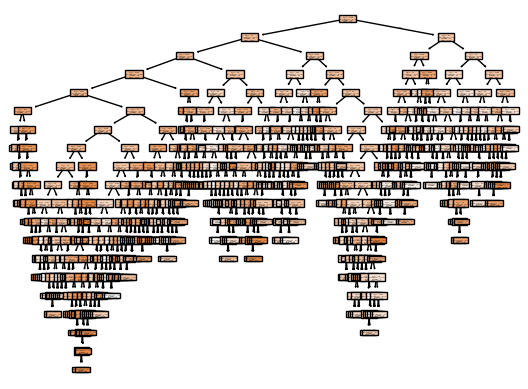

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [ ]:
best_model = linreg_model if linreg_mse < rf_mse else rf_model

In [ ]:
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")


Best model saved as 'best_model.pkl'


In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
print("Loading data and recreating preprocessors...")

Loading data and recreating preprocessors...


In [ ]:
df_setup = pd.read_csv('/content/Delivery_Time_Prediction.csv')

In [ ]:
target_col = 'Estimated_Delivery_Time_hours'
cols_to_drop = ['Order_ID']

In [ ]:
if target_col in df_setup.columns:
    X_ref = df_setup.drop(columns=[target_col])
else:
    X_ref = df_setup.copy()

In [ ]:
existing_drop = [c for c in cols_to_drop if c in X_ref.columns]
if existing_drop:
    X_ref.drop(columns=existing_drop, inplace=True)

In [ ]:
num_cols = X_ref.select_dtypes(include=['float64',
'int64']).columns.tolist()
cat_cols = X_ref.select_dtypes(include=['object']).columns.tolist()

In [ ]:
encoders = {}
scaler = MinMaxScaler()

In [ ]:
for col in cat_cols:
    le = LabelEncoder()
    X_ref[col] = X_ref[col].fillna(X_ref[col].mode().iloc[0])
    X_ref[col] = le.fit_transform(X_ref[col])
    encoders[col] = le


In [ ]:
X_ref[num_cols] = X_ref[num_cols].fillna(X_ref[num_cols].mean())
scaler.fit(X_ref[num_cols])

MinMaxScaler()

In [ ]:
with open('best_model.pkl', 'rb') as file:
    model = pickle.load(file)
print("Setup complete. Launching UI...")

Setup complete. Launching UI...


In [ ]:
def predict_outcome(*args):
    import pandas as pd
    import numpy as np
    input_data = pd.DataFrame([args], columns=cat_cols + num_cols)
    for col in cat_cols:
        val = input_data[col].iloc[0]


        if pd.isna(val):
            val = df_setup[col].mode().iloc[0]

        try:
            input_data[col] = encoders[col].transform([val])
        except ValueError:

            input_data[col] = 0

    input_data[num_cols] = input_data[num_cols].fillna(
        df_setup[num_cols].mean()
    )

    input_data[num_cols] = scaler.transform(input_data[num_cols])

    input_data = input_data.reindex(columns=X_ref.columns, fill_value=0)

    prediction = model.predict(input_data)

    return f"Predicted Target: {prediction[0]}"


In [ ]:
import pandas as pd
import gradio as gr

ui_inputs = []
original_df = pd.read_csv('/content/Delivery_Time_Prediction.csv')

# Categorical inputs first (Dropdowns)
for col in cat_cols:
    unique_vals = sorted(original_df[col].dropna().unique().tolist())
    ui_inputs.append(
        gr.Dropdown(
            choices=unique_vals,
            label=f"{col} (Select Option)"
        )
    )

# Numerical inputs next (Numbers)
for col in num_cols:
    ui_inputs.append(
        gr.Number(
            label=f"{col} (Enter Number)"
        )
    )


In [ ]:
iface = gr.Interface(
    fn=predict_outcome,
    inputs=ui_inputs,
    outputs="text",
    title="Estimated Delivery Time Prediction",
    description=(
        "Select weather, traffic, and vehicle details, then enter "
        "distance and preparation time to estimate delivery time."
    )
)

iface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cd4b74da3b40c8ef05.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
